# Description

This file contains functions to solve the systems of differential equations that define a quorum sensing system 

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Initialization

In [130]:
#Initialization function to go here

params = {"r":.5,"gamma":.01,"betaS":.1,"betaE":.2,"jPd":.20,"Vmax":20,"betaPD":100, 
          "m":1,"kRS":.025,"matrix":matrix,"numStrains":2}
params = tuple(params.values())

#initVal = [N1,N2,...Nf , S1,S2,...Sf,E,P]
initVals = (.0001,.0002,0,0,0,0)

#Matrix generation function to go here
matrix = np.array([[1,0],[0,1]])

In [131]:
#Single strain
def QS_ODES(t,state,r,g,bS,bE,j,v,bPD,m,kRS):
    N,S,E,P = state
    
    rAct = S/(kRS + S)
    
    fN = ((P/(1+P))*(1 - r*(rAct)**m) - g - N) * N
    fS = bS*(N - S)    
    fE = (rAct**m) * N - bE*E
    fP = j + v*E - (bPD*P/(P+1)) * N
    
    return [fN,fS,fE,fP]

In [132]:
#Multi strain
def QS_ODES(t,state,r,g,bS,bE,j,v,bPD,m,kRS,kAc,numStrains):
    
    strains = []
    P, E = state[-1], state[-2]
    N = []
    S = []
    
    numReceptors = kAc.shape[1] #if not a square matrix, find num of receptors involved; else, numReceptors = numStrains
    
    for i in range(2):
        startIdx = i*numStrains
        if i == 0:
            N = list(state[startIdx:startIdx + numStrains])
        if i == 1:
            S= list(state[startIdx:startIdx + numStrains])
    
    nTot = sum(N)
    S = np.asarray(S)
        
    numerator = np.matmul(S.T, kAc)
    denominator = np.matmul(S.T, kAc) #+np.matmul(S.T, kIn)
    
#     rAct = []
#     for j in range(numReceptors):
#         rAct_j = numerator[j]/(kRs+denominator[j])
#         rAct.append(rAct_j)

    rAct = []
    enzymeIterator = 0
    for j in range(numStrains):
        rAct_j = numerator.T[j]/(kRS+denominator.T[j])
        enzymeIterator += (rAct_j**numStrains)*N[i]
        rAct.append(rAct_j)
        
        
    enzymeIterator -= bE*E
    
    fN, fS = [], []
    for i in range(numStrains):
        fN_i=((P/(1+P))*(1 - r*(rAct[i])**m) - g - nTot) * N[i]
        fS_i = bS*(N[i] - S[i])
        fN.append(fN_i)
        fS.append(fS_i)
    
    fE = enzymeIterator
    fP = j + v*E - (bPD*P/(P+1)) * nTot
    
    result = fN + fS + list(fE) + list(fP)
    return result

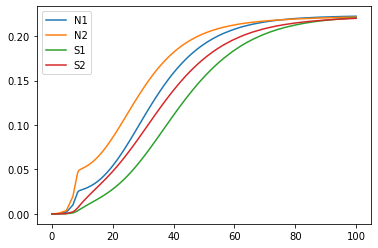

In [134]:
sol = solve_ivp(QS_ODES,t_span=(0,100),y0=initVals, vectorized=True ,args=params)


plt.figure()
plt.plot(sol.t,sol.y[0],label="N1")
plt.plot(sol.t,sol.y[1],label="N2")
plt.plot(sol.t,sol.y[2],label = "S1")
plt.plot(sol.t,sol.y[3],label = "S2")
# plt.plot(sol.t,sol.y[4],label = "E")
# plt.plot(sol.t,sol.y[5],label = "P")
plt.legend()
plt.show()


